## AGENDA
Clean full.json, and inspect the same things again as 01_inspect_ig_json_before_clean.ipynb

In [2]:
import os
import re
import json
from collections import Counter, defaultdict

import nltk
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

from utils import *
from clean_ig_json import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Clean ```full.json```

In [3]:
FULL_JSON = './ig_json/full.json'
IMG_DIR = '../../data/instagram/images'
WORD_MAP  = './meta_wstyle/data_mid/WORDMAP_flickr8k_1_cap_per_img_5_min_word_freq.json'

json_data = read_json(FULL_JSON)
word_map = read_json(WORD_MAP)

print('data size: ', len(json_data['images']))

data size:  658761


In [4]:
new_json_data = remove_backslash(json_data)
new_json_data = remove_unk(new_json_data)
new_json_data = truncate_ngram(new_json_data, n = 3, cap = 400)
new_json_data = truncate_ngram(new_json_data, n = 2, cap = 700)
new_json_data = truncate_ngram(new_json_data, n = 1, cap = 4000)
new_json_data = create_styles(new_json_data)

print('data size: ', len(new_json_data['images']))

data size:  469149


In [5]:
json_data = new_json_data

### Do the Same as 01.

In [6]:
tup_data = []
for img_dict in json_data['images']:
    tokens = img_dict['sentences'][0]['tokens']
    tup = (tokens, img_dict['split'], img_dict['filename'])
    tup_data.append(tup)
    
assert len(tup_data) == len(json_data['images'])

In [7]:
def plot_one_sample(tokens, img_fn):
    caption = ' '.join(tokens)
    img = Image.open(os.path.join(IMG_DIR, img_fn))
    fig, ax = plt.subplots(figsize = (8, 8))
    ax.imshow(img)
    ax.set_title(caption)

In [8]:
def plot_multi_samples(counter, split, k):
    fig, axs = plt.subplots(int(k/2), int(k/2), figsize = (10, 10))
    axs = axs.flatten()
    
    idxs = np.random.choice(len(counter[split]), k)
    for i, idx in enumerate(idxs):
        tup = counter[split][idx]
        tokens, img_fn = tup[0], tup[2]
        caption = ' '.join(tokens)
        img = Image.open(os.path.join(IMG_DIR, img_fn))
        axs[i].imshow(img)
        axs[i].set_title(caption)
    plt.tight_layout()

In [9]:
def search_pattern(tup_data, pattern):
    counter = defaultdict(list)
    for tokens, split, fn in tup_data:
        if pattern in tokens:
            tup = (tokens, split, fn)
            counter[split].append(tup)
    return counter

### Q1. How many sentences end with "\\"?

In [10]:
counter = search_pattern(tup_data, pattern = '\\')

for k, ls in counter.items():
    print(f'{k}: {len(ls)}')

In [11]:
counter

defaultdict(list, {})

### Q2: How many _UNK?

In [12]:
counter = search_pattern(tup_data, pattern = '_UNK')

for k, ls in counter.items():
    print(f'{k}: {len(ls)}')

In [13]:
counter

defaultdict(list, {})

### Q3: Most frequent first word/ first two words?

In [14]:
def show_ngram_freq(tup_data, n = 1, top_k = 10, verbose = True):
    ngram_counter = Counter()
    for tokens, _, _ in tup_data:
        ngram = tuple(tokens[:n])
        ngram_counter.update([ngram])

    ngram_counter = [(k, v) for k, v in ngram_counter.items()]
    ngram_counter = sorted(ngram_counter, key = lambda x: x[1], reverse = True)
    
    outs = []
    for i, (ngram, freq) in enumerate(ngram_counter):
        if i == top_k:
            break
        if verbose:
            print(f'{ngram} ({freq})')
        outs.append((ngram, freq))
    return outs

In [15]:
outs = show_ngram_freq(tup_data, n = 1, top_k = 10)

('happy',) (4000)
('this',) (4000)
('love',) (4000)
('my',) (4000)
('so',) (4000)
('the',) (4000)
('just',) (4000)
("it's",) (4000)
('i',) (4000)
("i'm",) (4000)


In [16]:
outs = show_ngram_freq(tup_data, n = 2, top_k = 10)

('good', 'morning') (700)
('love', 'this') (700)
('thank', 'you') (700)
('me', 'and') (700)
("it's", 'a') (700)
('on', 'the') (700)
('what', 'a') (700)
('this', 'is') (700)
('such', 'a') (700)
('i', 'love') (700)


In [17]:
outs = show_ngram_freq(tup_data, n = 3, top_k = 10)

('good', 'morning') (400)
('me', 'and', 'my') (400)
("can't", 'wait', 'to') (353)
('one', 'of', 'my') (351)
('happy', 'new', 'year') (316)
('getting', 'ready', 'for') (290)
('it', 'was', 'a') (285)
('thanks', 'for', 'the') (282)
('what', 'do', 'you') (279)
('happy', 'birthday', 'to') (237)


### Visualization

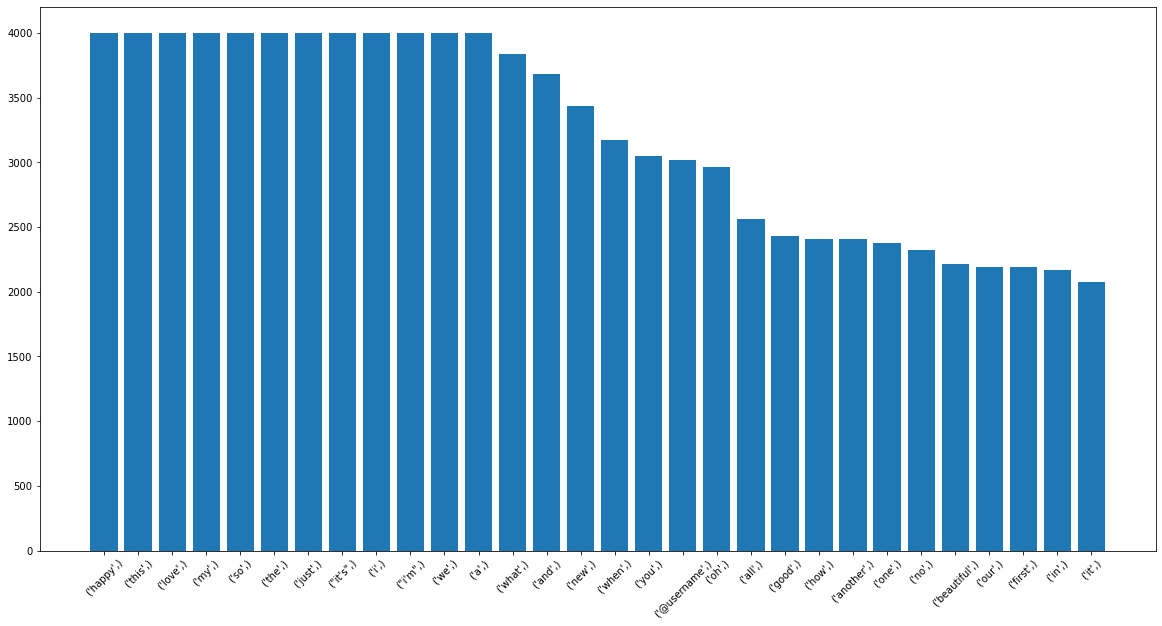

In [18]:
outs = show_ngram_freq(tup_data, n = 1, top_k = 30, verbose = False)
ngrams, freqs = zip(*outs)

plt.figure(figsize = (20,10))
plt.bar(range(len(ngrams)), freqs, align='center')
plt.xticks(range(len(ngrams)), ngrams, rotation = 45);

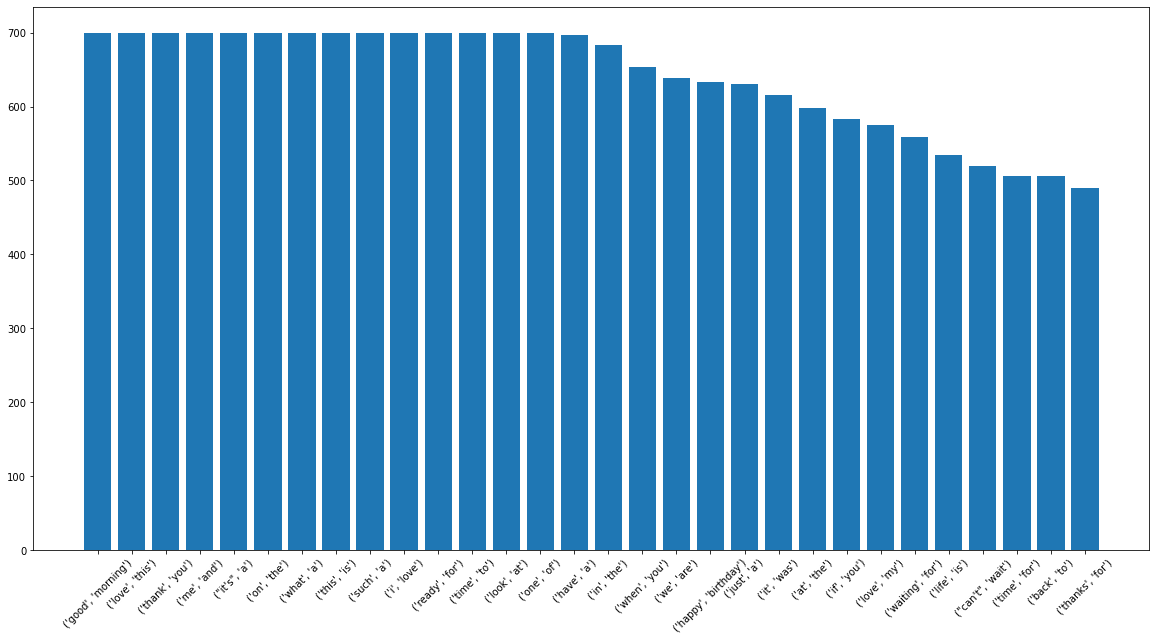

In [19]:
outs = show_ngram_freq(tup_data, n = 2, top_k = 30, verbose = False)
ngrams, freqs = zip(*outs)

plt.figure(figsize = (20,10))
plt.bar(range(len(ngrams)), freqs, align='center')
plt.xticks(range(len(ngrams)), ngrams, rotation = 45);

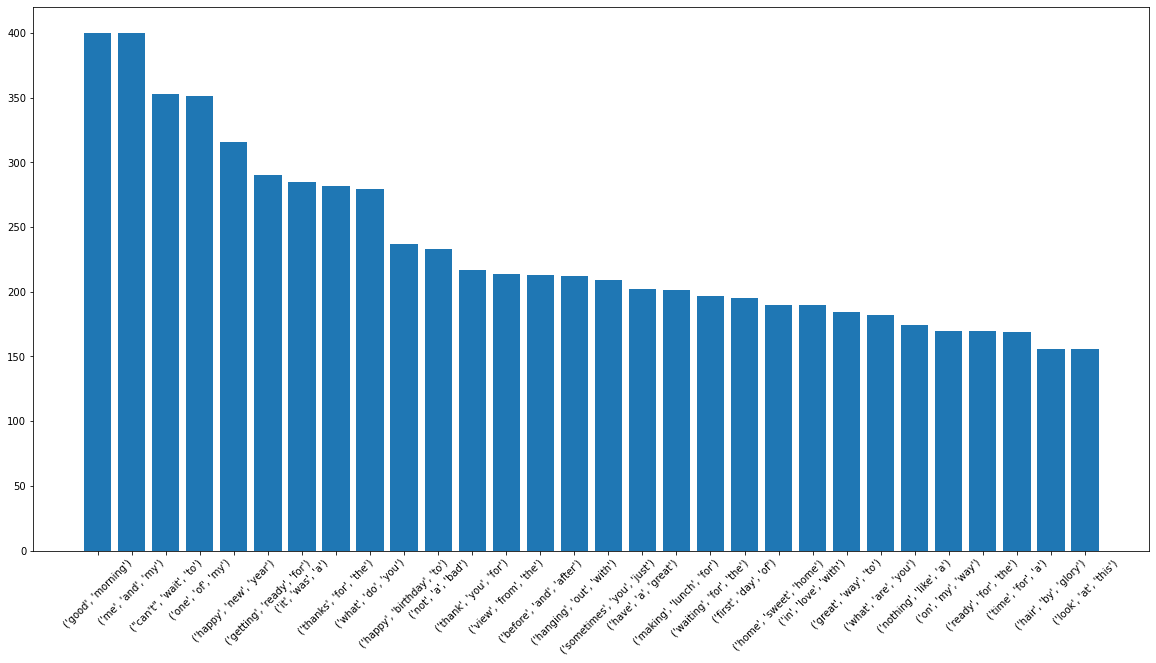

In [20]:
outs = show_ngram_freq(tup_data, n = 3, top_k = 30, verbose = False)
ngrams, freqs = zip(*outs)

plt.figure(figsize = (20,10))
plt.bar(range(len(ngrams)), freqs, align='center')
plt.xticks(range(len(ngrams)), ngrams, rotation = 45);

In [21]:
json_data['images'][0]

{'sentences': [{'tokens': ['really']}],
 'split': 'train',
 'filename': '215516711_@_297257398099952236_215516711',
 'styles': {'sentence_length': 1}}